In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('IMBD.csv')

In [15]:
df.sample(30)

,title,year,certificate,duration,genre,rating,description,stars,votes
4794,Percentage,(2014),Not Rated,86 min,"Action, Crime, Drama",4.1,"In Miami, two hustlers on the run set up a cre...","['Alex Merkin', '| ', ' Stars:', ""Cam'ron, ...","6,483"
9747,Dynasty,(2017–2022),TV-14,42 min,Drama,8.3,"Blake's trial begins, and every Carrington and...","['Melanie Mayron', '| ', ' Stars:', 'Elizab...",448
7856,Graffiti Verité 9: Soulful Ways - The DJ,(2010 Video),Not Rated,45 min,Documentary,NaN,"Watching those fingers move, teak, manipulate,...","['Bob Bryan', '| ', ' Stars:', 'A.N.T.I., '...",NaN
7476,Dwayne Perkins: Take Note,(2016 TV Special),TV-MA,68 min,"Documentary, Comedy",7.1,"In his debut special, Brooklyn comic Dwayne Pe...","['Ian Harris', '| ', ' Stars:', 'Dwayne Per...",355
7548,Unbreakable Kimmy Schmidt: Season 2 for Your C...,(2016 TV Movie),NaN,NaN,NaN,5.8,Add a Plot,"['Drew Beasley, ', 'Sammy Voit, ', 'Alberto Va...",10
4970,Getting Curious with Jonathan Van Ness,(2022– ),TV-MA,NaN,"Comedy, Reality-TV",6.9,Each episode follows Jonathan as he meets with...,"['Jonathan Van Ness, ', 'Rachel Dratch, ', 'Na...",770
5952,72 Dangerous Animals: Latin America,(2017),NaN,NaN,Documentary,6.6,"Powerful cats, indestructible arachnids and fl...","['Bob Brisbane, ', 'Vidal Haddad Jr., ', 'Just...",592
398,The Curse of Bridge Hollow,(2022),NaN,89 min,"Adventure, Comedy, Family",NaN,"A teenage girl, who accidentally releases an a...","['Jeff Wadlow', '| ', ' Stars:', 'Lauren La...",NaN
6221,Dr Jason Leong: Hashtag Blessed,(2020 TV Special),NaN,69 min,Comedy,7.0,"In this stand-up special, former doctor Jason ...","['Kubhaer T. Jethwani', '| ', ' Stars:', 'A...",178
1129,My Little Pony: Friendship Is Magic,(2010–2020),TV-Y,22 min,"Animation, Adventure, Comedy",7.6,"After learning that her friends, as well as he...","['Ashleigh Ball, ', 'Tara Strong, ', 'Tabitha ...","21,074"


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


In [110]:
df = df.drop_duplicates(subset=['title'], keep='first').reset_index(drop=True)

In [111]:
df.shape

(7912, 9)

In [112]:
df.isnull().sum()

title             0
year            502
certificate    3175
duration       1453
genre            64
rating         1040
description       0
stars             0
votes          1040
dtype: int64

In [113]:
num_cols = ["votes", "year", "duration", "rating"]
df[num_cols] = df[num_cols].replace("NaN", np.nan)

In [114]:
df['year'] = df['year'].astype(str).str.extract(r'(\d{4})')
df['year'] = pd.to_numeric(df['year'], errors='coerce').astype("Int64")

In [115]:
df['certificate'].value_counts()

certificate
TV-MA        1661
TV-14         841
R             464
Not Rated     453
TV-PG         313
PG-13         275
TV-Y7         168
PG            159
TV-Y          125
TV-G          109
Unrated        62
G              42
TV-Y7-FV       28
Approved       26
Passed          5
NC-17           2
MA-17           1
12              1
M               1
E10+            1
Name: count, dtype: int64

In [116]:
rating_map = {
    "G": "Kids", "PG": "Kids", "TV-Y": "Kids", "TV-Y7": "Kids", 
    "TV-Y7-FV": "Kids", "TV-G": "Kids",

    "PG-13": "Teens", "TV-PG": "Teens", "TV-14": "Teens", "12": "Teens", "E10+": "Teens",

    "R": "Adults", "NC-17": "Adults", "TV-MA": "Adults", "MA-17": "Adults", 
    "M": "Adults", "Passed": "Adults", "Approved": "Adults", 
    "Unrated": "Adults", "Not Rated": "Adults"
}

df['certificate_group'] = df['certificate'].map(rating_map)

print(df['certificate_group'].value_counts())
df = df.drop(columns=['certificate'])

certificate_group
Adults    2675
Teens     1431
Kids       631
Name: count, dtype: int64


In [117]:
df['duration'] = df['duration'].str.replace(" min", "", regex=False)
df['duration'] = pd.to_numeric(df['duration'], errors="coerce")

In [118]:
df['votes'] = df['votes'].astype(str).str.replace(",", "")
df['votes'] = df['votes'].replace("NaN", np.nan)
df['votes'] = pd.to_numeric(df['votes'], errors="coerce")

In [119]:
df.isnull().sum()

title                   0
year                  594
duration             1453
genre                  64
rating               1040
description             0
stars                   0
votes                1040
certificate_group    3175
dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7912 entries, 0 to 7911
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              7912 non-null   object 
 1   year               7318 non-null   Int64  
 2   duration           6459 non-null   float64
 3   genre              7848 non-null   object 
 4   rating             6872 non-null   float64
 5   description        7912 non-null   object 
 6   stars              7912 non-null   object 
 7   votes              6872 non-null   float64
 8   certificate_group  4737 non-null   object 
dtypes: Int64(1), float64(3), object(5)
memory usage: 564.2+ KB


In [121]:
df.head()

,title,year,duration,genre,rating,description,stars,votes,certificate_group
0,Cobra Kai,2018,30.0,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...",177031.0,Teens
1,The Crown,2016,58.0,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...",199885.0,Adults
2,Better Call Saul,2015,46.0,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...",501384.0,Adults
3,Devil in Ohio,2022,356.0,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...",9773.0,Adults
4,Cyberpunk: Edgerunners,2022,24.0,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...",15413.0,Adults


In [122]:
df['votes'].sample(15)

7118       251.0
4828       266.0
2466      2813.0
141     120241.0
6001       108.0
7721        17.0
2403      1142.0
7029        35.0
5557      3362.0
2410      1278.0
864      64848.0
4739       713.0
6861       552.0
4072       513.0
5560      4167.0
Name: votes, dtype: float64

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, PowerTransformer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [132]:
text_transformer = Pipeline([
    ('selector', FunctionTransformer(lambda x: x.squeeze(), validate=False)),
    ('tfidf', TfidfVectorizer(max_features=5000, stop_words='english'))
])

In [133]:
class MultiLabelBinarizerTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mlb = MultiLabelBinarizer()

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            series = X.iloc[:, 0]
        else:
            series = pd.Series(X.ravel())

        genres = series.apply(lambda x: [g.strip() for g in x.split(',')] if isinstance(x, str) else [])
        self.mlb.fit(genres)
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            series = X.iloc[:, 0]
        else:
            series = pd.Series(X.ravel())

        genres = series.apply(lambda x: [g.strip() for g in x.split(',')] if isinstance(x, str) else [])
        return self.mlb.transform(genres)

    def get_feature_names_out(self, input_features=None):
        return [f"genre_{cls}" for cls in self.mlb.classes_]

In [134]:
class TopNStarsEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, top_n=10):
        self.top_n = top_n
        self.top_stars_ = None

    def fit(self, X, y=None):
        if isinstance(X, pd.DataFrame):
            series = X.iloc[:, 0]
        else:
            series = pd.Series(X.ravel())

        stars = series.apply(lambda x: [s.strip() for s in x.split(',')] if isinstance(x, str) else [])
        all_stars = [s for sublist in stars for s in sublist]
        self.top_stars_ = pd.Series(all_stars).value_counts().nlargest(self.top_n).index
        return self

    def transform(self, X):
        if isinstance(X, pd.DataFrame):
            series = X.iloc[:, 0]
        else:
            series = pd.Series(X.ravel())

        stars = series.apply(lambda x: [s.strip() for s in x.split(',')] if isinstance(x, str) else [])

        return pd.DataFrame(
            [[1 if star in s else 0 for star in self.top_stars_] for s in stars],
            columns=[f"star_{star}" for star in self.top_stars_]
        )


In [135]:
cert_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'))
])

genre_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('mlb', MultiLabelBinarizerTransformer())
])

duration_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('power', PowerTransformer()),
    ('scale', StandardScaler())
])

votes_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scale', StandardScaler())
])

In [136]:
t1 = ColumnTransformer([
    ('yr_imputer',SimpleImputer(strategy='median'), ['year']),
    ('rating_imputer',SimpleImputer(strategy='mean'), ['rating']),
    
    ('certificate', cert_pipe, ['certificate_group']),
    ('genre', genre_pipe, ['genre']),
    
    ('votes', votes_pipe, ['votes']),
    ('duration', duration_pipe, ['duration']),

    ('stars_top', TopNStarsEncoder(top_n=500), ['stars']),
    
    ('Desc', text_transformer, ['description'])
], remainder='drop')

C:\Users\dpjad\AppData\Local\Temp\ipykernel_20252\4236440400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['votes'])


<Axes: xlabel='votes', ylabel='Density'>

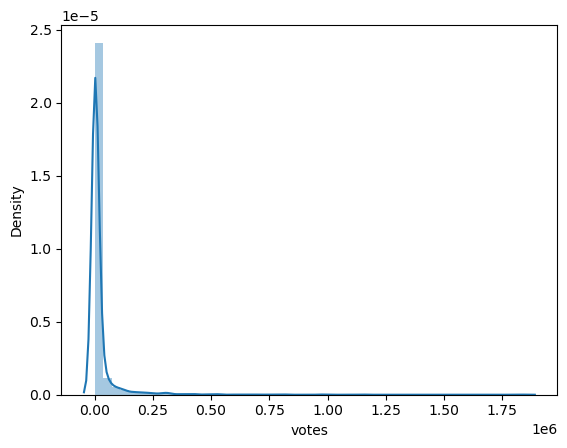

In [137]:
sns.distplot(df['votes'])

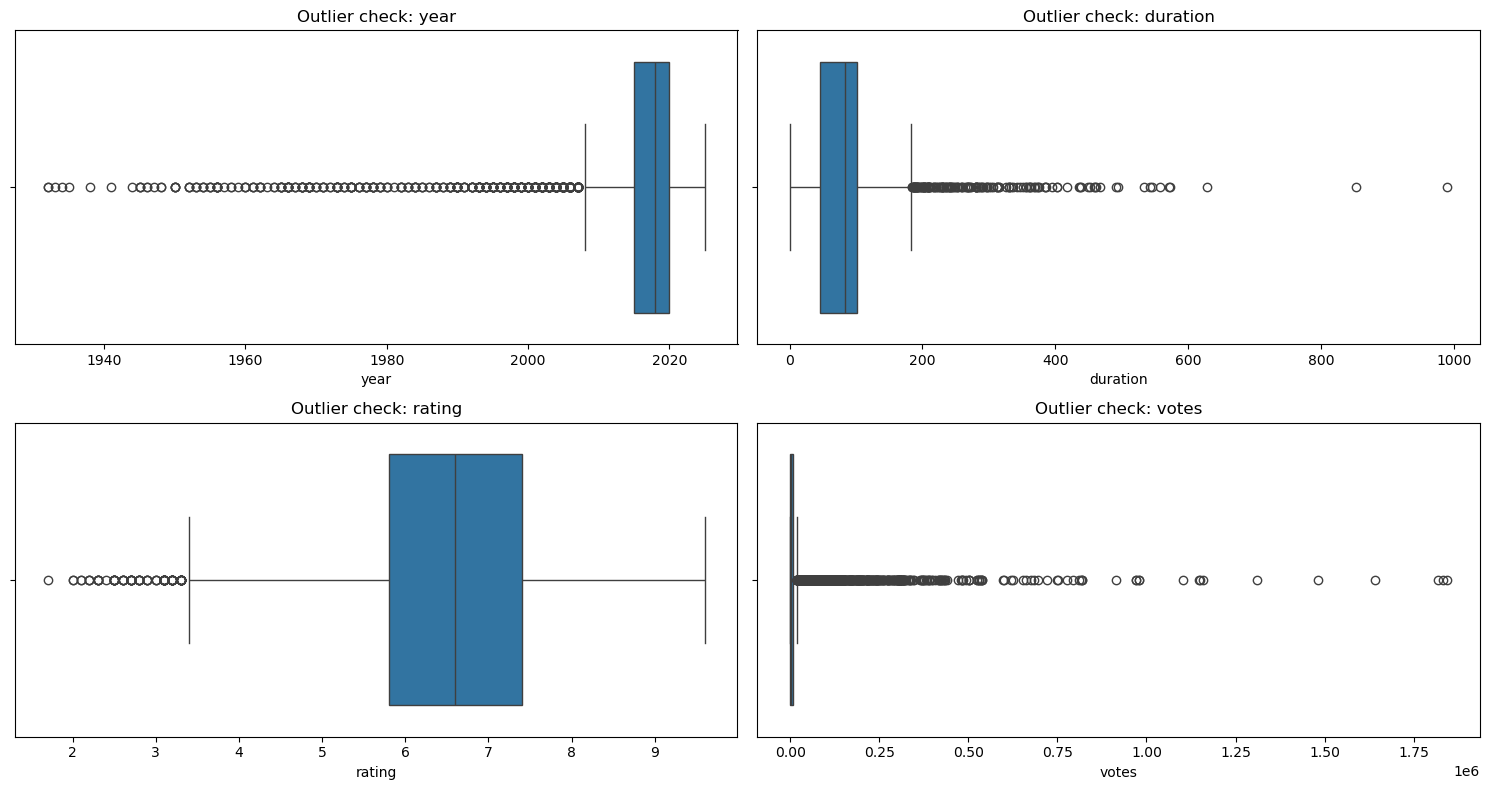

In [138]:
numeric_cols = ["year", "duration", "rating", "votes"]

def plot_outliers(df, cols):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(cols, 1):
        plt.subplot(2, 2, i)
        sns.boxplot(x=df[col])
        plt.title(f"Outlier check: {col}")
    plt.tight_layout()
    plt.show()

plot_outliers(df, numeric_cols)

In [147]:
pipeline = Pipeline(steps=[
    ("t1", t1)
])

In [154]:
movie = pipeline.fit_transform(df)

print("Feature matrix shape:", movie.shape)


Feature matrix shape: (7912, 5534)


In [155]:
from sklearn.metrics.pairwise import cosine_similarity

movie_matrix = pipeline.fit_transform(df)
movie_matrix = movie_matrix.toarray() 
content_sim = cosine_similarity(movie_matrix)


In [157]:
from rapidfuzz import process
from difflib import get_close_matches

def get_best_match(movie_title, df):
    titles = df['title'].tolist()
    match, score, idx = process.extractOne(movie_title, titles)
    if score > 70: 
        return df.iloc[idx]
    else:
        return None

In [158]:
def recommend_content(movie_title, df, content_sim, top_n=5):
    titles = df['title'].tolist()
    best_match = get_close_matches(movie_title, titles, n=1, cutoff=0.6)

    if not best_match:
        print(f"Movie '{movie_title}' not found in dataset.")
        return None

    matched_title = best_match[0]
    idx = df[df['title'] == matched_title].index[0]

    sim_scores = list(enumerate(content_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    print(f"Showing recommendations for: {matched_title}\n")
    recs = df.iloc[movie_indices][['title', 'genre', 'rating']]
    return recs

In [159]:
recommend_content("dexer", df, content_sim, top_n=6)

Showing recommendations for: Dexter



,title,genre,rating
54,Dark,"Crime, Drama, Mystery",8.7
128,Mindhunter,"Crime, Drama, Mystery",8.6
142,Homeland,"Crime, Drama, Mystery",8.3
191,Twin Peaks,"Crime, Drama, Mystery",8.8
322,Luther,"Crime, Drama, Mystery",8.4
186,The Americans,"Crime, Drama, Mystery",8.4


In [160]:
np.save("content_sim.npy", content_sim)
df.to_pickle("movies.pkl")